- Họ và Tên: Nguyễn Vạn Phúc Huy 
- MSSV: 23110163

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


ModuleNotFoundError: No module named 'google'

In [6]:
%cd /content/drive/MyDrive/ĐHCN/TH_TKMT&UD/GK_ThucHanh/De1

/content/drive/MyDrive/ĐHCN/TH_TKMT&UD/GK_ThucHanh/De1


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, binom, norm

# Bài 1

In [14]:
# Đọc file dữ liệu
file_path = 'mpg.csv'  # Đảm bảo file csv có trong thư mục làm việc
mpg_df = pd.read_csv(file_path)

In [15]:
# (1.0đ) Kiểm tra dữ liệu bị thiếu hoặc trùng lặp
print("\n### KIỂM TRA DỮ LIỆU THIẾU & TRÙNG LẶP ###")
missing_values = mpg_df.isnull().sum()
print("Số lượng giá trị bị thiếu:")
print(missing_values)
mpg_df.dropna(inplace=True)  # Xóa dòng thiếu dữ liệu
mpg_df.drop_duplicates(inplace=True)  # Xóa các dòng trùng lặp
print("Dữ liệu sau khi xử lý không còn giá trị bị thiếu hoặc trùng lặp.\n")



### KIỂM TRA DỮ LIỆU THIẾU & TRÙNG LẶP ###
Số lượng giá trị bị thiếu:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
Dữ liệu sau khi xử lý không còn giá trị bị thiếu hoặc trùng lặp.



In [16]:
# (1.0đ) Tính thống kê cơ bản
print("\n### THỐNG KÊ CƠ BẢN ###")
mean_values = mpg_df[['cylinders', 'horsepower', 'weight']].mean()
median_values = mpg_df[['cylinders', 'horsepower', 'weight']].median()
mpg_range = (mpg_df['mpg'].min(), mpg_df['mpg'].max())
mpg_q1 = mpg_df['mpg'].quantile(0.25)
mpg_q3 = mpg_df['mpg'].quantile(0.75)
print("Trung bình của cylinders, horsepower, weight:")
print(mean_values)
print("Trung vị của cylinders, horsepower, weight:")
print(median_values)
print(f"Khoảng giá trị MPG: {mpg_range}")
print(f"Phân vị Q1, Q3 của MPG: ({mpg_q1}, {mpg_q3})\n")


### THỐNG KÊ CƠ BẢN ###
Trung bình của cylinders, horsepower, weight:
cylinders        5.471939
horsepower     104.469388
weight        2977.584184
dtype: float64
Trung vị của cylinders, horsepower, weight:
cylinders        4.0
horsepower      93.5
weight        2803.5
dtype: float64
Khoảng giá trị MPG: (9.0, 46.6)
Phân vị Q1, Q3 của MPG: (17.0, 29.0)



In [17]:
# (1.0đ) Tính mức tiêu hao nhiên liệu trung bình theo 'origin'
print("\n### TIÊU HAO NHIÊN LIỆU TRUNG BÌNH THEO XUẤT XỨ ###")
mpg_by_origin = mpg_df.groupby('origin')['mpg'].mean()
print(mpg_by_origin)
print("Xe từ khu vực nào tiêu hao ít nhiên liệu nhất?", mpg_by_origin.idxmin(), "với MPG trung bình là", mpg_by_origin.min())



### TIÊU HAO NHIÊN LIỆU TRUNG BÌNH THEO XUẤT XỨ ###
origin
europe    27.602941
japan     30.450633
usa       20.033469
Name: mpg, dtype: float64
Xe từ khu vực nào tiêu hao ít nhiên liệu nhất? usa với MPG trung bình là 20.0334693877551



### BIỂU ĐỒ PHÂN PHỐI TRỌNG LƯỢNG & CÔNG SUẤT ###


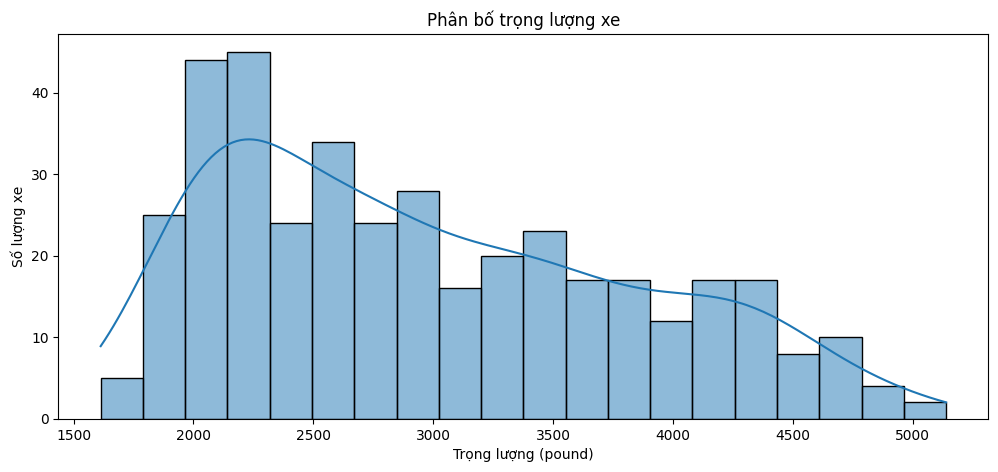

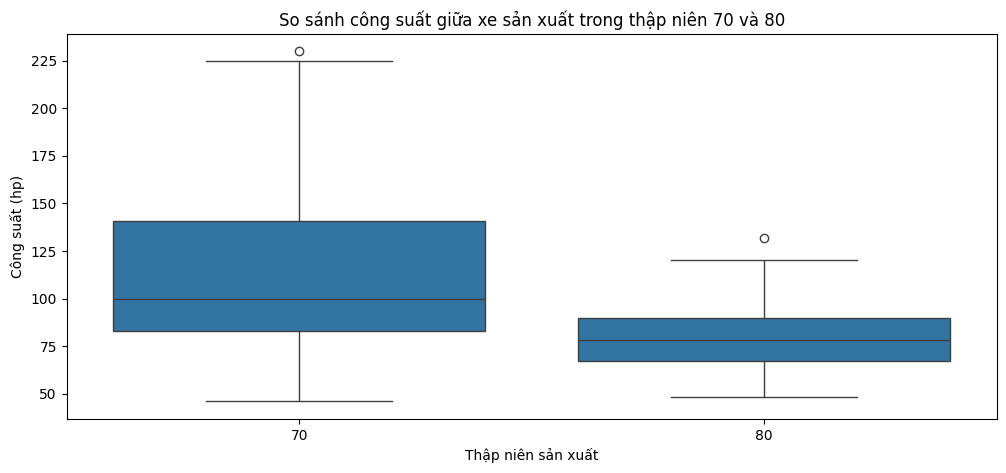

In [18]:
# (1.0đ) Vẽ biểu đồ Histogram và Boxplot
print("\n### BIỂU ĐỒ PHÂN PHỐI TRỌNG LƯỢNG & CÔNG SUẤT ###")
plt.figure(figsize=(12, 5))
sns.histplot(mpg_df['weight'], bins=20, kde=True)
plt.title("Phân bố trọng lượng xe")
plt.xlabel("Trọng lượng (pound)")
plt.ylabel("Số lượng xe")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=mpg_df['model_year'] // 10 * 10, y=mpg_df['horsepower'])
plt.title("So sánh công suất giữa xe sản xuất trong thập niên 70 và 80")
plt.xlabel("Thập niên sản xuất")
plt.ylabel("Công suất (hp)")
plt.show()


### BIỂU ĐỒ SCATTER PLOT THỂ HIỆN MỐI QUAN HỆ MPG ###


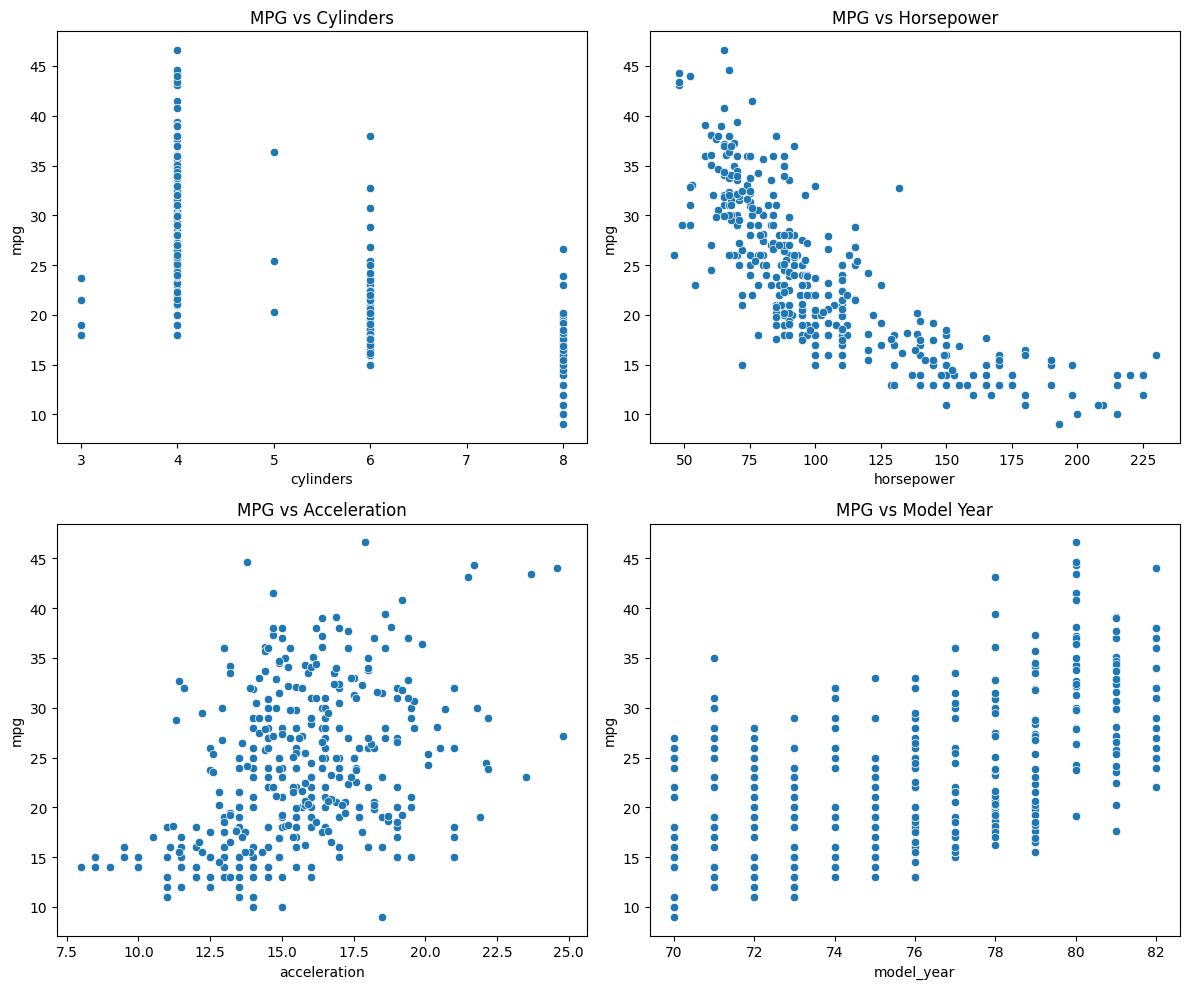

In [19]:
# (1.0đ) Vẽ Scatter Plot thể hiện mối quan hệ mpg với các yếu tố khác
print("\n### BIỂU ĐỒ SCATTER PLOT THỂ HIỆN MỐI QUAN HỆ MPG ###")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(x=mpg_df['cylinders'], y=mpg_df['mpg'], ax=axes[0,0])
axes[0,0].set_title("MPG vs Cylinders")
sns.scatterplot(x=mpg_df['horsepower'], y=mpg_df['mpg'], ax=axes[0,1])
axes[0,1].set_title("MPG vs Horsepower")
sns.scatterplot(x=mpg_df['acceleration'], y=mpg_df['mpg'], ax=axes[1,0])
axes[1,0].set_title("MPG vs Acceleration")
sns.scatterplot(x=mpg_df['model_year'], y=mpg_df['mpg'], ax=axes[1,1])
axes[1,1].set_title("MPG vs Model Year")
plt.tight_layout()
plt.show()

# Bài 2

In [20]:
# Bài 2: Phân phối xác suất trong sản xuất vi mạch
print("\n### PHÂN TÍCH XÁC SUẤT TRONG SẢN XUẤT VI MẠCH ###")
# (a) Poisson: Tính xác suất có hơn 3 lỗi
prob_more_than_3 = 1 - poisson.cdf(3, mu=2)
print(f"Xác suất có hơn 3 lỗi trong lô hàng: {prob_more_than_3:.4f}")

# (b) Nhị thức: Xác suất có đúng 18 vi mạch đạt chuẩn
prob_18_success = binom.pmf(18, 20, 0.95)
print(f"Xác suất có đúng 18 vi mạch đạt tiêu chuẩn: {prob_18_success:.4f}")

# (c) Phân phối chuẩn
prob_under_45 = norm.cdf(45, loc=50, scale=5)
thresh_top_5 = norm.ppf(0.05, loc=50, scale=5)
print(f"Xác suất hoàn thành lô hàng trong 45 phút: {prob_under_45:.4f}")
print(f"Thời gian cần để vào top 5% nhanh nhất: {thresh_top_5:.2f} phút")



### PHÂN TÍCH XÁC SUẤT TRONG SẢN XUẤT VI MẠCH ###
Xác suất có hơn 3 lỗi trong lô hàng: 0.1429
Xác suất có đúng 18 vi mạch đạt tiêu chuẩn: 0.1887
Xác suất hoàn thành lô hàng trong 45 phút: 0.1587
Thời gian cần để vào top 5% nhanh nhất: 41.78 phút
